## Install independencies

In [202]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

## Importing the data

In [145]:
data_email = pd.read_csv('mail_data.csv') 
data_email.head() 


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Structure of the dataset

In [146]:
data_email.describe(include='all')

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [147]:
# Counts the number of spams and hams
spam_output = data_email['Category'].to_numpy() 
numberOfham=0
numberOfSpam=0
for i in spam_output:
    if i=='ham':
        numberOfham+=1 
    else:
        numberOfSpam+=1 
counts = [numberOfham,numberOfSpam]

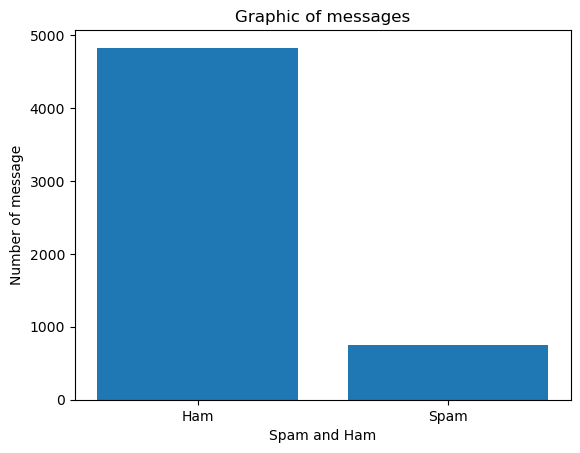

In [148]:
# create arrayofvalues
spam_output = data_email['Category'].to_numpy()

# create a bar chart
labels = ["Ham", "Spam"]
plt.bar(labels, counts)
plt.xlabel("Spam and Ham")
plt.ylabel("Number of message")
plt.title("Graphic of messages")
plt.show()

## Arranging the category to boolean type

In [149]:
data_email.loc[data_email['Category']=='spam', 'Category'] = 0
data_email.loc[data_email['Category']=='ham', 'Category'] = 1

In [150]:
data_email

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


## Splitting the data as texts and labels

In [151]:
#input
X = data_email['Message']
#output 
Y = data_email['Category']

## Splitting the data into training data and test data for anticipate the accuracy

In [152]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=3)

We consider the train data for 80 percent and 20 percent for the test.

To ensure that the same splitted data will be reproducible as though the dataset is trained many times, we use the random_state parameter equalized to 3 (as a key for the algorithm which generates the randoms numbers).

### Checking of the result obtained

In [153]:
print(X.shape) 
print(x_train.shape) 
print(x_test.shape) 

(5572,)
(4457,)
(1115,)


## Feature Extraction (convert text into numeric)

- TfidfVectorizer is a common technique used in spam detection because it can convert textual data into numerical features that can be used in machine learning models based on natural language processing algorithms (NLPA).
- Tfdif stands for "Term Frequency-Inverse Document Frequecy", which is a technique used to measure the importance of each word in a text corpus.
- a text corpus is an input for a NLPA

### Initilization of a TFIDF

In [154]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase =True)  

- min_df means that for inclunding anyword, it is must be appear at least one time in the text;
- the stop_words sets the word (commonly used in a language) that will be removed during the processing
- lowercase sets all words in lowercase before the process.

In [155]:
x_train_features = feature_extraction.fit_transform(x_train) 

### Feature Space

Before talking about the feature space. Let us explain what is the feature vector:
- A feature vector is a numerical vector that represents the features of an example in a dataset. Each feature represents a specific piece of information about the example, which can be used to train a machine learning model. For example, in the case of the textual data, each feature may represent the number of occurences of a specific word in the text, or TF-IDF score of that word.

- Thus, the feature space is the set of all features vectors for all examples in a dataset. It is an abstract mathematical space that is defined by choice of features and the way they are transformed or normalized. In machine we usually train models on datasets that have been preprocessed into an appropriate feature space. This allows machine learning algorithms to process the data in a way that is more conducive to detecting relastionships and patterns.  

### Function fit_transform()

- The function fit_transform() fits The TfidfVectorizer object to the training data 'x_train' to learn the vocabulary and IDF (inverse document frequency) weights of the terms in the text corpus. This is done using fit() method of The TfidfVectorizer object.
- The same function transforms the training data 'x_train' into a matrix of TF-IDF features. That matrix will be used after as input to train a machine learning model, such as a classifier.


In [156]:
x_test_features = feature_extraction.transform(x_test)

Here, we use the transform() function on test_data instead of fit_transform() because we want to the use the same feature space obtained when we fited the x_train data. We must ensure that the test data is transfomed into the same feature space as the training data, allowing for accurate comparison and evaluation of the model performance. 

N.B: By using the new feature space obtained from x_test, considered as our input can lead to potentially biased results, because we would be learing new vocabulary and IDF weights that were not present in the training data.

### Set the output values into int

In [157]:
#ensure that all output has int type
y_train = y_train.astype('int')
y_test = y_test.astype('int')

### Logical regression Model for predictions

In [158]:
model = LogisticRegression()

In [159]:
model.fit(x_train_features, y_train)

LogisticRegression()

## Evaluating the model 

In [164]:
#Evaluating models by predicting the test values and then compare to the y_test
predictions = model.predict(x_test_features) 
score_percent = accuracy_score(y_test,predictions)
score

0.9659192825112107

In [204]:
# compute evaluation metrics
acc_score = accuracy_score(y_test, predictions)
prec_score = precision_score(y_test, predictions, pos_label=0)
rec_score = recall_score(y_test, predictions, pos_label=0)
f1 = f1_score(y_test, predictions, pos_label=0) 
print("Accuracy score:", acc_score)
print("Precision score:", prec_score)
print("Recall score:", rec_score)
print("F1 score:", f1)

Accuracy score: 0.9659192825112107
Precision score: 1.0
Recall score: 0.7548387096774194
F1 score: 0.8602941176470589


## Building a Predictive System

In [ ]:
input_text = input("Enter your mail here: ")
input_vector = feature_extraction.transform([input_text])
prediction = model.predict(input_vector)[0]
    
if prediction == 0:
    print("This is a spam message")
else:
    print("This is not a spam message")